1. Lakukan EDA dan Pre-Processing sesuai dengan tujuan analisis dan kondisi data!
2. Hasil dari EDA dan pre-processing dapat diinterpretasikan
3. Lakukan pemodelan menggunakan algoritma klasifikasi KNN, Decision Tree dan Naive Bayes
4. Gunakan matriks evaluasi accuracy score, recall dan precision. buatlah kesimpulan algoritma mana yang paling baik.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#### 1. Lakukan EDA dan Pre-Processing sesuai dengan tujuan analisis dan kondisi data!

In [ ]:
data = pd.read_csv('/content/Training.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
data.shape

(2460, 9)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2460 entries, 0 to 2459
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2460 non-null   int64  
 1   Glucose                   2460 non-null   int64  
 2   BloodPressure             2460 non-null   int64  
 3   SkinThickness             2460 non-null   int64  
 4   Insulin                   2460 non-null   int64  
 5   BMI                       2460 non-null   float64
 6   DiabetesPedigreeFunction  2460 non-null   float64
 7   Age                       2460 non-null   int64  
 8   Outcome                   2460 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 173.1 KB


In [ ]:
data.isnull().sum() #-> untuk mengecek missing value

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000
mean,3.817480,121.602033,68.915041,20.531301,80.119919,31.990447,0.491440,32.821951,0.390244
std,3.296458,31.789270,19.082655,15.716901,116.765807,7.802569,0.363917,11.251208,0.487904
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,100.000000,64.000000,0.000000,0.000000,27.100000,0.251750,24.000000,0.000000
50%,3.000000,117.000000,70.000000,23.000000,36.000000,32.100000,0.381000,29.000000,0.000000
75%,6.000000,142.000000,80.000000,33.000000,129.000000,36.500000,0.647000,39.000000,1.000000
max,17.000000,197.000000,122.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


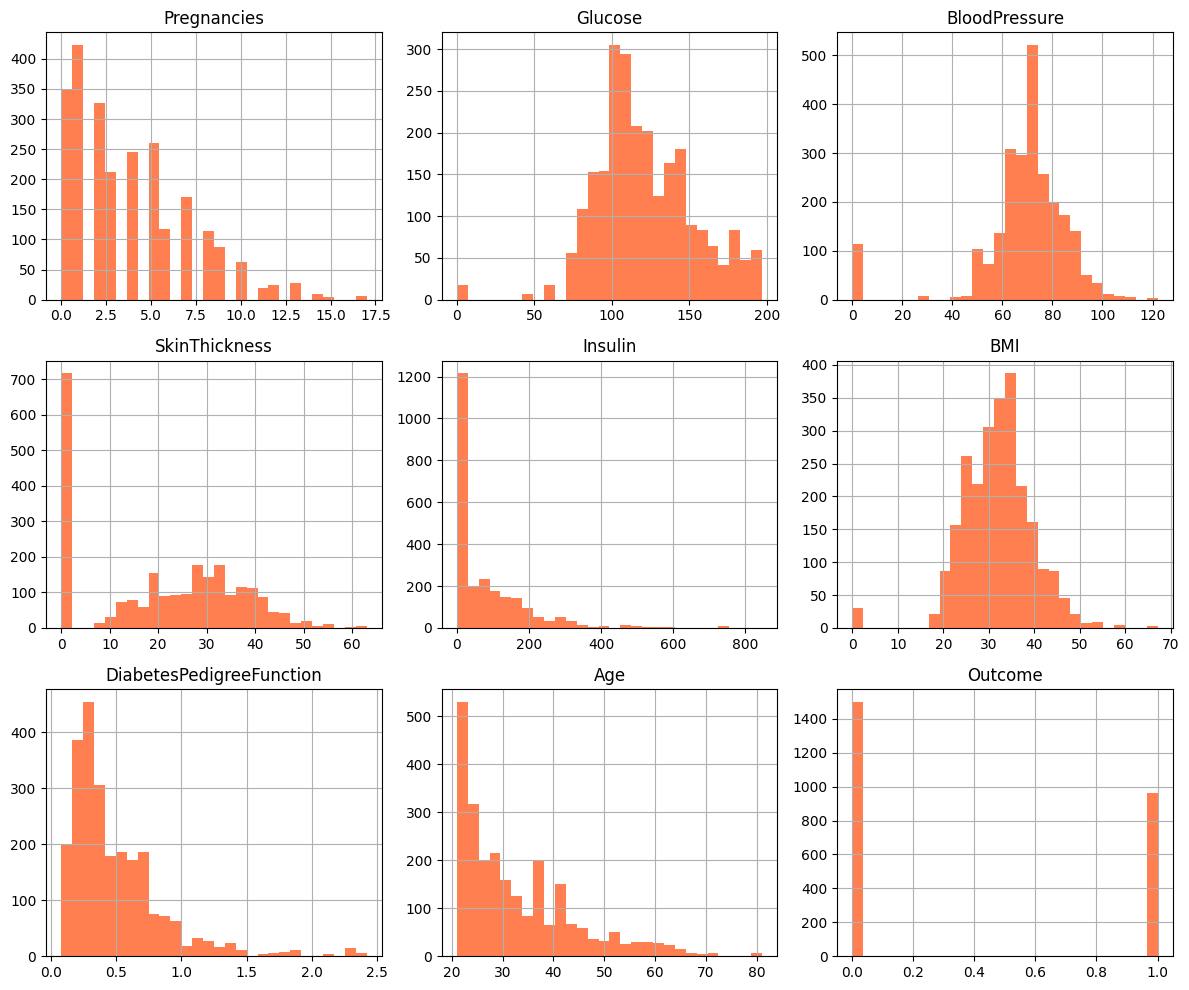

In [ ]:
data.hist(figsize=(12, 10), bins=28, color='coral')
plt.tight_layout()  # -> Untuk menyesuaikan layout agar data tidak tumpang tindih
plt.show()

In [ ]:
# Mengecek data yang outlier
def outlier(data):
    columns = data.select_dtypes(include=['int', 'float']).columns
    outlier_counts = {}
    for x in columns:
        Q1 = data[x].quantile(0.25)
        Q3 = data[x].quantile(0.75)
        IQR = Q3-Q1
        lower_bound = Q1 -1.5*IQR
        upper_bound = Q3+1.5*IQR
        outliers = data[(data[x] < lower_bound) | (data[x] > upper_bound)]
        outlier_counts[x] = len(outliers)

    return outlier_counts

outlier_counts = outlier(data)
print(f'Data yang Outlier : {outlier_counts}')

Data yang Outlier : {'Pregnancies': 21, 'Glucose': 17, 'BloodPressure': 140, 'SkinThickness': 0, 'Insulin': 97, 'BMI': 56, 'DiabetesPedigreeFunction': 103, 'Age': 63, 'Outcome': 0}


In [ ]:
# Membersihkan data yang outlier
def remove_outlier(data):
    columns = data.select_dtypes(include=['int', 'float']).columns
    cleaned_data = data.copy()  # Membuat salinan DataFrame untuk menghindari perubahan pada data asli
    for column in columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        cleaned_data = cleaned_data[(cleaned_data[column] >= lower_bound) &
         (cleaned_data[column] <= upper_bound)]
    return cleaned_data

data_cleaned = remove_outlier(data)

In [ ]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2027 entries, 0 to 2459
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2027 non-null   int64  
 1   Glucose                   2027 non-null   int64  
 2   BloodPressure             2027 non-null   int64  
 3   SkinThickness             2027 non-null   int64  
 4   Insulin                   2027 non-null   int64  
 5   BMI                       2027 non-null   float64
 6   DiabetesPedigreeFunction  2027 non-null   float64
 7   Age                       2027 non-null   int64  
 8   Outcome                   2027 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 158.4 KB


#### 2. Hasil dari EDA dan pre-processing dapat diinterpretasikan

Ada sebuah data yang dimana kita ingin melakukan pre-processing sebelum melakukan analisisnya. Dari data diatas kita melakukan pre-processing dan mengetahui bahwa jumlah kolom dataset tersebut sebanyak 2460, dan kolomnya sebanyak 9. Lalu kita kita ingin mengecek masalah pada data tersebut dengan menngunakan 'data.info()' dan menghasilkan output bahwa tidak ada data yang bernilai null. Selanjutnya untuk missing valuenya tidak ada. Setelah mengecek missing value kita memperoleh hasil visualisasi data tersebut, serta mengecek data yang outlier.

Tujuan : untuk mengetahui jumlah orang yang terkena diabetes, mulai dari usianya, ibu hamil yang terdampak, insulinnya berapa, glukosanya berapa, dan lain sebagainya.

Kondisi data : untuk kondisi data tidak ada yang mempunyai missning value (0), tetapi ada beberapa data yang mengalami outlier. Seperti
- data pregnancies = 21
- data glucose = 17
- data bloodpressure = 140
- data insulin = 97
- data BMI = 55
- data diabetespredigree function = 103
- data usia = 63
Data - data tersebut yang memiliki data outlier dan sudah di cleaning.

Interpretasi EDA:
1. Data "pregnancies" -> data tertinggi kasus diabetes untuk ibu hamil sebanyak > 400 kasus yang berada di frekuensi 0.0, dan data terendah sebanyak > 0.10 kasus yang berada di frekuensi 17.5. Semakin tinggi yang terkena diabetes maka semakin sedikit pula frekuensinya.
2. Data "glucose" -> data tertinggi kasus diabetes untuk kadar glukosa sebanyak > 300 yang berada di frekuensi 100, dan data terendah < 0.15 yang berada di frekuensi 15.
3. Data "bloodpressure" data tertinggi kasus diabetes untuk tekanan darahnya sebanyak > 500 yang berada di frekuensi < 85 dan data terendah < 0.5 yang berada di frekuensi < 35.
4. Data "insulin" -> data tertinggi kasus diabetes untuk kadar insulin bagi penderita sebesar > 1200 yang berada di frekuensi < 0.3 dan data terendah sebesar < 0.3 yang berada di frekuensi > 400.
5. Data "BMI" -> data tertinggi kasus diabetes untuk Indeks massa tubuh bagi penderita sebesar < 350 yang berada di frekuensi > 35 dan data terendah sebesar < 0.3 yang berada di frekuensi 120.
6. Data "Diabetespredigree function" -> data tertinggi kasus diabetes bagi penderita sebesar > 400 yang berada di frekuensi > 0.3 dan data terendah sebesar < 0.3 yang berada di frekuensi > 2.0.
7. Data "Age" -> data tertinggi kasus diabetes untuk usia bagi penderita sebesar > 500 yang berada di frekuensi > 20 dan data terendah sebesar < 0.1 yang berada di frekuensi 70.



#### 3. Lakukan pemodelan menggunakan algoritma klasifikasi KNN, Decision Tree dan Naive Bayes

In [ ]:
# Permodelan K-Nearest Neighbors (KNN)
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Menentukan data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Membuat Model KNN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Mengevaluasi model
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Akurasi model KNN: {:.2f}%".format(accuracy * 100))

Akurasi model KNN: 98.52%


In [ ]:
# Permodelan Decision Tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Persiapan data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Pembuatan model
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

# Evaluasi model
y_pred = dtree.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Akurasi model Decision Tree: {:.2f}%".format(accuracy * 100))

Akurasi model Decision Tree: 99.26%


In [ ]:
# Permodelan Naive Bayes
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Persiapan data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Pembuatan model
nb = GaussianNB()
nb.fit(X_train, y_train)

# Evaluasi model
y_pred = nb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Akurasi model Naive Bayes: {:.2f}%".format(accuracy * 100))

Akurasi model Naive Bayes: 69.95%


#### 4. Gunakan matriks evaluasi accuracy score, recall dan precision. Buatlah kesimpulan algoritma mana yang paling baik.

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
# Menghitung data latih dan data uji
(x_train.shape[0]/len(x))*100, (x_test.shape[0]/len(x))*100

(79.97039960532807, 20.029600394671927)

[[259   3]
 [  3 141]]
0.9852216748768473
0.9791666666666666
0.9791666666666666


<Axes: >

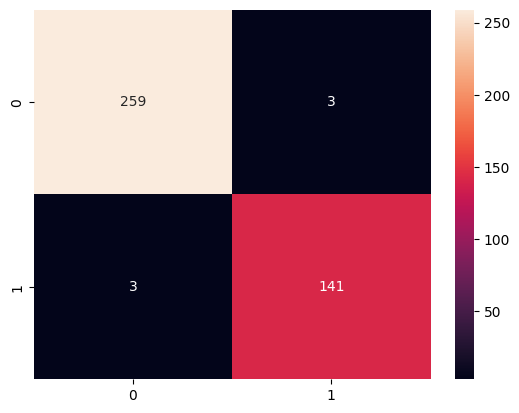

In [ ]:
# Permodelan K-Nearest Neighbors menggunakan matriks evaluasi accuracy score, recall dan precision.
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)

from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score
print(confusion_matrix(y_test, y_pred_knn))
print(accuracy_score(y_test, y_pred_knn))
print(recall_score(y_test, y_pred_knn))
print(precision_score(y_test, y_pred_knn))

cm = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm, annot=True, fmt='d')

[[260   2]
 [  1 143]]
0.9926108374384236
0.9930555555555556
0.9862068965517241


<Axes: >

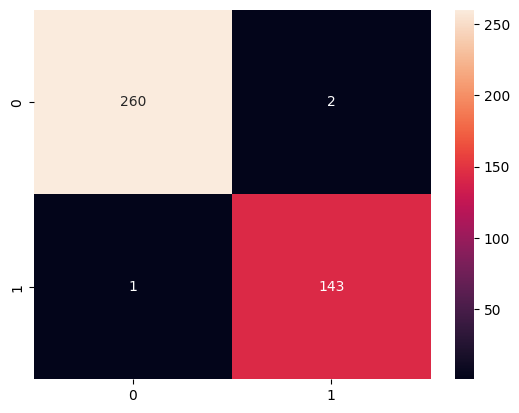

In [ ]:
# Permodelan Decision Tree menggunakan matriks evaluasi accuracy score, recall dan precision.
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
y_pred_dt = dt.predict(x_test)

from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score
print(confusion_matrix(y_test, y_pred_dt))
print(accuracy_score(y_test, y_pred_dt))
print(recall_score(y_test, y_pred_dt))
print(precision_score(y_test, y_pred_dt))

cm = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm, annot=True, fmt='d')

[[201  61]
 [ 61  83]]
0.6995073891625616
0.5763888888888888
0.5763888888888888


<Axes: >

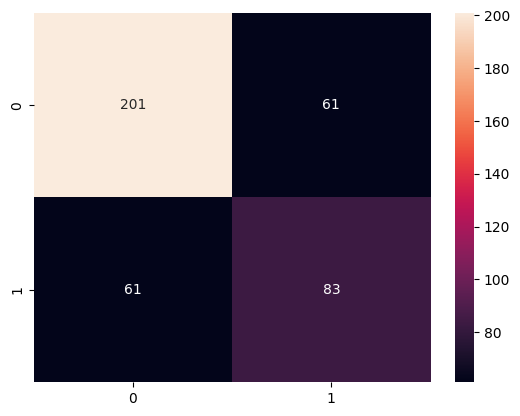

In [ ]:
# Permodelan Naive Bayes menggunakan matriks evaluasi accuracy score, recall dan precision.
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)
y_pred_nb = nb.predict(x_test)

from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score
print(confusion_matrix(y_test, y_pred_nb))
print(accuracy_score(y_test, y_pred_nb))
print(recall_score(y_test, y_pred_nb))
print(precision_score(y_test, y_pred_nb))

cm = confusion_matrix(y_test, y_pred_nb)
sns.heatmap(cm, annot=True, fmt='d')

Dari hasil kesimpulan diatas menunjukkan bahwa algoritma yang baik adalah decision tree. Karena memiliki nilai akurasi serta nilai matriks evaluasi yang sesuai dan tinggi dengan rata - rata nilai sebesar 99.26%, sedangkan untuk algoritma knn sebesar 98.52%, dan algoritma naive bayes sebesar 69.95%. Algoritma permodelan Decision Tree juga memiliki nilai prediksi yang lebih seimbang dibandingkan dengan KNN dan Naive Bayes yang memiliki nilai prediksi yang bias.